Information about the DATA:

Content price price in US dollars ( 326−−18,823)

carat weight of the diamond (0.2--5.01)

cut quality of the cut (Fair, Good, Very Good, Premium, Ideal)

color diamond colour, from J (worst) to D (best)

clarity a measurement of how clear the diamond is (I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best))

x length in mm (0--10.74)

y width in mm (0--58.9)

z depth in mm (0--31.8)

depth total depth percentage = z / mean(x, y) = 2 * z / (x + y) (43--79)

table width of top of diamond relative to widest point (43--95)

In [41]:
# import the libraries
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
import seaborn as sns
import matplotlib.pyplot as plt

import pandas as pd

In [42]:
# 2. Data Collection
data = pd.read_csv('Dimond.csv')
data

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
1,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
2,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
3,6,0.24,Very Good,J,VVS2,62.8,57.0,336,3.94,3.96,2.48
4,7,0.24,Very Good,I,VVS1,62.3,57.0,336,3.95,3.98,2.47
...,...,...,...,...,...,...,...,...,...,...,...
43035,53935,0.72,Premium,D,SI1,62.7,59.0,2757,5.69,5.73,3.58
43036,53936,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
43037,53937,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
43038,53939,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


In [43]:
# describing all rows in the data
data.describe(include="all")

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
count,43040.000000,43040.000000,43040,43040,43040,43040.000000,43040.000000,43040.000000,43040.000000,43040.000000,43040.000000
unique,NaN,NaN,5,7,8,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,Ideal,G,SI1,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,17424,9080,10363,NaN,NaN,NaN,NaN,NaN,NaN
mean,26758.804554,0.796964,NaN,NaN,NaN,61.746080,57.439542,3942.706343,5.724376,5.728122,3.534367
std,15484.904515,0.481455,NaN,NaN,NaN,1.435246,2.240196,4023.534556,1.132496,1.159641,0.714543
min,2.000000,0.200000,NaN,NaN,NaN,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,13326.750000,0.380000,NaN,NaN,NaN,61.000000,56.000000,940.000000,4.660000,4.670000,2.870000
50%,26824.500000,0.710000,NaN,NaN,NaN,61.800000,57.000000,2388.000000,5.710000,5.720000,3.530000
75%,40290.250000,1.030000,NaN,NaN,NaN,62.500000,59.000000,5309.250000,6.500000,6.500000,4.020000


In [44]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43040 entries, 0 to 43039
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  43040 non-null  int64  
 1   carat       43040 non-null  float64
 2   cut         43040 non-null  object 
 3   color       43040 non-null  object 
 4   clarity     43040 non-null  object 
 5   depth       43040 non-null  float64
 6   table       43040 non-null  float64
 7   price       43040 non-null  int64  
 8   x           43040 non-null  float64
 9   y           43040 non-null  float64
 10  z           43040 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 3.6+ MB


In [45]:
# to see how many NaN value we have in each column
data.isna().sum()


Unnamed: 0    0
carat         0
cut           0
color         0
clarity       0
depth         0
table         0
price         0
x             0
y             0
z             0
dtype: int64

In [46]:
# how many duplicate we have in data
data.duplicated().sum()

0

In [47]:
data.drop_duplicates(inplace=True)


In [48]:
# see the unique value we have in one column
data['cut'].unique()

array(['Premium', 'Good', 'Very Good', 'Fair', 'Ideal'], dtype=object)

In [49]:
data['color'].unique()

array(['E', 'I', 'J', 'F', 'H', 'D', 'G'], dtype=object)

In [50]:
data['clarity'].unique()

array(['SI1', 'VS2', 'SI2', 'VVS2', 'VVS1', 'I1', 'VS1', 'IF'],
      dtype=object)

In [51]:
data.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
1,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
2,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
3,6,0.24,Very Good,J,VVS2,62.8,57.0,336,3.94,3.96,2.48
4,7,0.24,Very Good,I,VVS1,62.3,57.0,336,3.95,3.98,2.47


In [52]:
data.dropna(inplace=True)

In [53]:
# changing text column to only numbers 
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
le = LabelEncoder()


# Apply LabelEncoder to the categorical columns
data['cut'] = le.fit_transform(data['cut'])
data['clarity'] = le.fit_transform(data['clarity'])
data['color'] = le.fit_transform(data['color'])



data.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,2,0.21,3,1,2,59.8,61.0,326,3.89,3.84,2.31
1,4,0.29,3,5,5,62.4,58.0,334,4.20,4.23,2.63
2,5,0.31,1,6,3,63.3,58.0,335,4.34,4.35,2.75
3,6,0.24,4,6,7,62.8,57.0,336,3.94,3.96,2.48
4,7,0.24,4,5,6,62.3,57.0,336,3.95,3.98,2.47


In [54]:
# create new column named 'target' have 0,1 numbers only
average_price = data['price'].mean()

# Create the "target" column based on your criteria
data['target'] = data['price'].apply(lambda x: 0 if x <= average_price else 1)
data[data['price']>average_price]

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z,target
4764,5934,1.01,3,5,2,61.6,58.0,3944,6.45,6.51,3.99,1
4765,5935,0.90,0,0,2,66.1,55.0,3945,5.98,5.92,3.93,1
4766,5936,1.01,2,2,3,62.7,57.0,3945,6.37,6.43,4.01,1
4767,5937,1.01,4,2,3,60.8,63.0,3945,6.32,6.38,3.86,1
4768,5938,1.01,4,2,3,62.5,61.0,3945,6.33,6.37,3.97,1
...,...,...,...,...,...,...,...,...,...,...,...,...
22320,27745,2.29,3,5,2,61.8,59.0,18797,8.52,8.45,5.24,1
22321,27746,2.00,4,4,2,62.8,57.0,18803,7.95,8.00,5.01,1
22322,27747,2.07,2,3,3,62.5,55.0,18804,8.20,8.13,5.11,1
22323,27749,2.00,4,3,2,63.5,56.0,18818,7.90,7.97,5.04,1


In [55]:
# deleting price column 
data= data.drop('price', axis=1)

data.to_csv("Clean_Dimond.csv",index=False)

In [56]:
# read csv file
data = pd.read_csv('Clean_Dimond.csv')
data.head()


,Unnamed: 0,carat,cut,color,clarity,depth,table,x,y,z,target
0,2,0.21,3,1,2,59.8,61.0,3.89,3.84,2.31,0
1,4,0.29,3,5,5,62.4,58.0,4.20,4.23,2.63,0
2,5,0.31,1,6,3,63.3,58.0,4.34,4.35,2.75,0
3,6,0.24,4,6,7,62.8,57.0,3.94,3.96,2.48,0
4,7,0.24,4,5,6,62.3,57.0,3.95,3.98,2.47,0


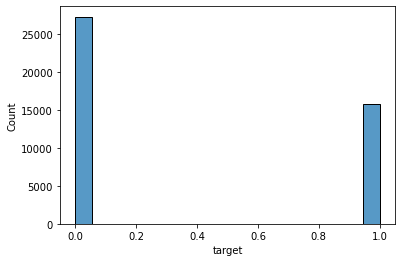

In [57]:
# to see column plot
sns.histplot(data=data, x="target");

            Unnamed: 0     carat       cut     color   clarity     depth  \
Unnamed: 0    1.000000 -0.374606 -0.016846 -0.097847  0.140799 -0.040978   
carat        -0.374606  1.000000  0.018856  0.289262 -0.216275  0.022599   
cut          -0.016846  0.018856  1.000000  0.005687  0.018322 -0.191203   
color        -0.097847  0.289262  0.005687  1.000000 -0.025557  0.044708   
clarity       0.140799 -0.216275  0.018322 -0.025557  1.000000 -0.048255   
depth        -0.040978  0.022599 -0.191203  0.044708 -0.048255  1.000000   
table        -0.116833  0.191260  0.154112  0.035701 -0.095477 -0.292084   
x            -0.407353  0.974368  0.026007  0.264321 -0.224646 -0.031088   
y            -0.395176  0.946001  0.030617  0.256271 -0.215521 -0.034945   
z            -0.400306  0.948625  0.006041  0.260951 -0.221693  0.088335   
target       -0.490737  0.796754  0.051930  0.167014 -0.125328  0.004510   

               table         x         y         z    target  
Unnamed: 0 -0.116833 -0.

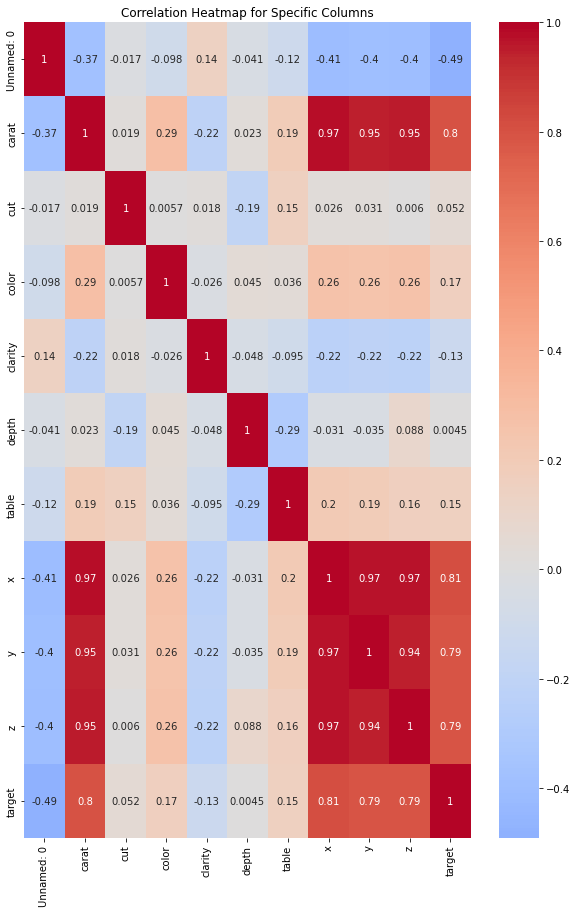

In [58]:
import seaborn as sns

# Calculate correlation matrix for the specific columns
corr_matrix = data.corr()
print(corr_matrix)
# Create a figure and set its size
plt.figure(figsize=(10, 15))

# Plot the correlation heatmap for the specific columns
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", center=0)

# Show the plot
plt.title('Correlation Heatmap for Specific Columns')
plt.show()


In [59]:
# Splitting the data into training and test sets (80% train, 20% test)

from sklearn.model_selection import train_test_split
X = data.drop('target', axis=1)
y = data['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [60]:
# Logistic Regression Classifier

from sklearn.linear_model import LogisticRegression

train = LogisticRegression(max_iter=50, random_state=42)
train.fit(X_train, y_train)
y_pred = train.predict(X_test)

D:\programs\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [61]:
# Evaluate Model Performance
accuracy = accuracy_score(y_test, y_pred)
print("The accuarcy is : ",accuracy)

The accuarcy is :  0.9144981412639405


In [62]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[5065  454]
 [ 282 2807]]


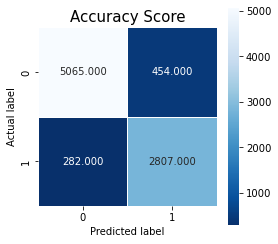

In [63]:
plt.figure(figsize=(4,4))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score'
plt.title(all_sample_title, size = 15);

In [64]:
#improve the accracy of training

# Logistic Regression Classifier
train = LogisticRegression(max_iter=500, random_state=42)
train.fit(X_train, y_train)
y_pred = train.predict(X_test)
y_pred

array([0, 0, 1, ..., 0, 1, 1], dtype=int64)

In [65]:
# Evaluate Model Performance

accuracy = accuracy_score(y_test, y_pred)
print("The accuarcy is : ",accuracy)

The accuarcy is :  0.9487685873605948


In [66]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[5278  241]
 [ 200 2889]]


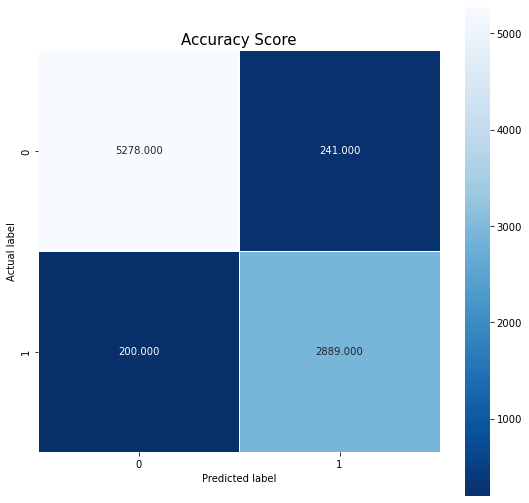

In [67]:
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score'
plt.title(all_sample_title, size = 15);

In [68]:
# save module

import joblib
model_filename = 'model_of _data.joblib'
joblib.dump(train, model_filename)
print(f"Model saved as {model_filename}")

Model saved as model_of _data.joblib


In [69]:
# Load the saved model
import joblib
model_data = joblib.load(model_filename)


In [70]:
# test module

test = model_data.predict(X_test.head(1))
test


array([0], dtype=int64)

# ----------------------------------------------------------------------------------------------------------

## (SVM)


In [71]:
# Importing the dataset
dataset = pd.read_csv('Clean_Dimond.csv')
#X = dataset.iloc[:, [1,2,3,4,5,6,7,8,9]].values
#y = dataset.iloc[:, 10].values
dataset

,Unnamed: 0,carat,cut,color,clarity,depth,table,x,y,z,target
0,2,0.21,3,1,2,59.8,61.0,3.89,3.84,2.31,0
1,4,0.29,3,5,5,62.4,58.0,4.20,4.23,2.63,0
2,5,0.31,1,6,3,63.3,58.0,4.34,4.35,2.75,0
3,6,0.24,4,6,7,62.8,57.0,3.94,3.96,2.48,0
4,7,0.24,4,5,6,62.3,57.0,3.95,3.98,2.47,0
...,...,...,...,...,...,...,...,...,...,...,...
43035,53935,0.72,3,0,2,62.7,59.0,5.69,5.73,3.58,0
43036,53936,0.72,2,0,2,60.8,57.0,5.75,5.76,3.50,0
43037,53937,0.72,1,0,2,63.1,55.0,5.69,5.75,3.61,0
43038,53939,0.86,3,4,3,61.0,58.0,6.15,6.12,3.74,0


In [72]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X = dataset.drop('target', axis=1)
y = dataset['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)


In [73]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


In [74]:
# Fitting Kernel SVM to the Training set
from sklearn.svm import SVC
classifier = SVC(kernel = 'rbf', random_state = 42)
classifier.fit(X_train, y_train)
print (classifier.score(X_test, y_test))

0.9860594795539034


In [75]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)
y_pred

array([0, 1, 0, ..., 1, 0, 0], dtype=int64)

In [76]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[5418   59]
 [  61 3070]]


In [77]:
accuracy = accuracy_score(y_test, y_pred)
print("The accuarcy is : ",accuracy)
####

The accuarcy is :  0.9860594795539034


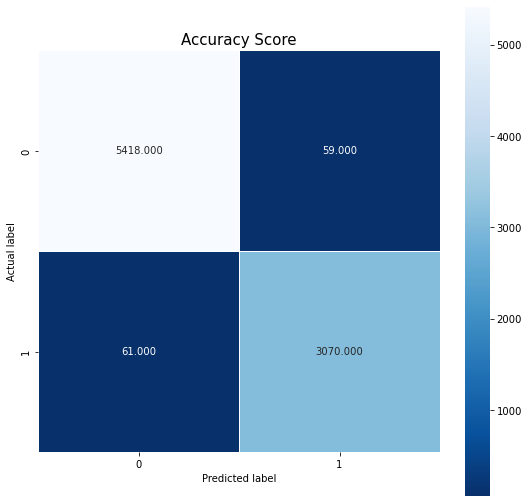

In [78]:
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score'
plt.title(all_sample_title, size = 15);

In [79]:
import joblib
model_filename = 'model_of _data2.joblib'
joblib.dump(classifier, model_filename)
print(f"Model saved as {model_filename}")

Model saved as model_of _data2.joblib


In [80]:
# Load the saved model
import joblib
model_data = joblib.load(model_filename)

In [81]:
test = model_data.predict(X_test)
test

array([0, 1, 0, ..., 1, 0, 0], dtype=int64)

# ----------------------------------------------------------------------------------------------------------

# (Decision Tree):


In [82]:
# Decision Tree Classification

# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [83]:
# Importing the dataset
dataset = pd.read_csv('Clean_Dimond.csv')
#X = dataset.iloc[:, [1,2,3,4,5,6,7,8,9]].values
#y = dataset.iloc[:, 10].values
dataset

,Unnamed: 0,carat,cut,color,clarity,depth,table,x,y,z,target
0,2,0.21,3,1,2,59.8,61.0,3.89,3.84,2.31,0
1,4,0.29,3,5,5,62.4,58.0,4.20,4.23,2.63,0
2,5,0.31,1,6,3,63.3,58.0,4.34,4.35,2.75,0
3,6,0.24,4,6,7,62.8,57.0,3.94,3.96,2.48,0
4,7,0.24,4,5,6,62.3,57.0,3.95,3.98,2.47,0
...,...,...,...,...,...,...,...,...,...,...,...
43035,53935,0.72,3,0,2,62.7,59.0,5.69,5.73,3.58,0
43036,53936,0.72,2,0,2,60.8,57.0,5.75,5.76,3.50,0
43037,53937,0.72,1,0,2,63.1,55.0,5.69,5.75,3.61,0
43038,53939,0.86,3,4,3,61.0,58.0,6.15,6.12,3.74,0


In [84]:
# Splitting the data into training and test sets (80% train, 20% test)

from sklearn.model_selection import train_test_split

X = dataset.drop('target', axis=1)
y = dataset['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [85]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


In [86]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators=100)
classifier.fit(X_train, y_train)


RandomForestClassifier()

In [87]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

# Cross-validation (assuming X and y are your data and labels)
scores = cross_val_score(classifier, X, y, cv=5)  # 5-fold cross-validation

average_accuracy = scores.mean()
print(average_accuracy)

0.8722351301115241


In [88]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)
y_pred

array([0, 0, 1, ..., 1, 0, 0], dtype=int64)

In [89]:
# 5. Evaluate Model Performance
accuracy = accuracy_score(y_test, y_pred)
print("The accuarcy is : ",accuracy)

The accuarcy is :  0.999907063197026


In [90]:

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[6875    0]
 [   1 3884]]


In [91]:
y_train.head()

42626    0
38018    0
42962    0
1897     0
15257    1
Name: target, dtype: int64

In [92]:
import joblib
model_filename = 'model_of_dimond.joblib'
joblib.dump(classifier, model_filename)
print(f"Model saved as {model_filename}")

Model saved as model_of_dimond.joblib


In [93]:
# Load the saved model
import joblib
model_data = joblib.load(model_filename)

In [94]:
test = model_data.predict(X_test)
test

array([0, 0, 1, ..., 1, 0, 0], dtype=int64)